# Credit Risk Analysis

### Goal: 
- Conduct an Exploratory Data Analysis (EDA) to identify key patterns and variables indicating potential loan repayment difficulties, assisting the company in risk assessment and enabling informed decisions on loan approvals, amounts, and interest rates.

### Tasks: 
- Data collecting: Load current and previous datasets and merge them.
- Data Cleaning: copy the original dataset, drop duplicates, handle missing values by dropping or filling the null values, change datatypes and create new features for better insights. 
- Data Analysis and Visualisation: perform univariate, bivariate and multivariate analysis, making complex relationships more accessible and insightful.

### Import Libraries

In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Settings

In [3]:
# See all columns when dataset is loaded
pd.set_option("display.max_columns", None)
# Display float (not in scientific format)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

## Data collecting

### Load first dataset

In [4]:
# Load the CSV Application data
data = pd.read_csv("application_data.csv")
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0

In [5]:
# Check null values for target variable
data["TARGET"].isnull().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# Check descriptive statistics for all numeric features 
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.00,0.38,0.40,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.07,0.13,0.10,0.14,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.

### Load second dataset

In [8]:
# Load CSV Previous Application
data_prev = pd.read_csv("previous_application.csv")
data_prev

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,NaN,607500.00,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,NaN,112500.00,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,NaN,450000.00,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,NaN,337500.00,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.29,267295.50,311400.00,0.00,267295.50,WEDNESDAY,12,Y,1,0.00,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.00,low_normal,POS industry with interest,365243.00,-508.00,362.00,-358.00,-351.00,0.00
1670210,2357031,334635,Consumer loans,6622.02,87750.00,64291.50,29250.00,87750.00,TUESDAY,15,Y,1,0.34,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.00,middle,POS industry with interest,365243.00,-1604.00,-1274.00,-1304.00,-1297.00,0.00
1670211,2659632,249544,Consumer loans,11520.85,105237.00,102523.50,10525.50,105237.00,MONDAY,12,Y,1,0.10,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.00,low_normal,POS household with interest,365243.00,-1457.00,-1187.00,-1187.00,-1181.00,0.00
1670212,2785582,400317,Cash loans,18821.52,180000.00,191880.00,NaN,180000.00,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.00,low_normal,Cash X-Sell: low,365243.00,-1155.00,-825.00,-825.00,-817.00,1.00


In [9]:
# check columns of data_prev
data_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Merging these two datasets

In [10]:
# Create a list of columns that has the same name in both Dataframes before merge
col_name = []

for col1 in data.columns:
    for col2 in data_prev.columns:
        if col1 == col2:
            col_name.append(col1)
print(col_name)

['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']


In [11]:
# Performing left join on columns with same name  
mdata1 = pd.merge(data, data_prev, on=col_name, how='left')
mdata1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_APPLICATION,AMT_DOWN_PAYMENT,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,

In [12]:
# No missing values in my target variable
mdata1["TARGET"].isnull().sum()

0

In [13]:
# All ID are unique values
mdata1["SK_ID_CURR"].nunique()

307511

## Data Cleaning

### Create a copy

In [14]:
mdata2 = mdata1.copy()
mdata2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_APPLICATION,AMT_DOWN_PAYMENT,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,

In [15]:
mdata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 151 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(81), int64(41), object(29)
memory usage: 354.3+ MB


In [16]:
mdata2.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_APPLICATION,AMT_DOWN_PAYMENT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00,4.00,4.00,0.00,4.00,0.00,0.00,0.00,4.00,4.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90,1647820.25,517500.00,NaN,1.00,NaN,NaN,NaN,-147.00,-1.00,24.00,NaN,NaN,NaN,N

### Check duplicates

In [17]:
# Check the numbers of duplicates
mdata2.duplicated().sum()

0

### Handling missing values

#### Drop Columns with 50% of or more missing values

In [18]:
# Drop columns that present 50% or more missing values
# Print list with col dropped
miss_50 = []

for col in mdata2.columns:
    if mdata2[col].isnull().sum() >= 153756:
        miss_50.append(col)
        mdata2 = mdata2.drop(col, axis=1)
print(miss_50)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'SK_ID_PREV', 'AMT_APPLICATION', 'AMT_DOWN_PAYMENT', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'N

In [19]:
mdata2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.26,0.14,0.97,0.08,0.97,0.08,0.97,0.08,0.01,No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.62,NaN,0.99,0.29,0.99,0.29,0.99,0.29,0.07,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,-19005,-3039,-9833.00,-2437,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,0.00,2.00,0.00,-617.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,-19932,-3038,-4311.00,-3458,1,1,0,1,0,0,Core staff,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-1106.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.00,254700.00,27558.00,225000.00,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.03,-9327,-236,-8456.00,-198

In [20]:
mdata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

#### Check and Drop columns with 20% or more of missing values

In [21]:
# Check percentage of remaining missing values
for col in mdata2.columns:
    if mdata2[col].isnull().sum() != 0:
        val = mdata2[col].isnull().sum()
        print(f"{col} has {(val/307511)*100:.1f} % missing values")

AMT_ANNUITY has 0.0 % missing values
AMT_GOODS_PRICE has 0.1 % missing values
NAME_TYPE_SUITE has 0.4 % missing values
OCCUPATION_TYPE has 31.3 % missing values
CNT_FAM_MEMBERS has 0.0 % missing values
EXT_SOURCE_2 has 0.2 % missing values
EXT_SOURCE_3 has 19.8 % missing values
YEARS_BEGINEXPLUATATION_AVG has 48.8 % missing values
FLOORSMAX_AVG has 49.8 % missing values
YEARS_BEGINEXPLUATATION_MODE has 48.8 % missing values
FLOORSMAX_MODE has 49.8 % missing values
YEARS_BEGINEXPLUATATION_MEDI has 48.8 % missing values
FLOORSMAX_MEDI has 49.8 % missing values
TOTALAREA_MODE has 48.3 % missing values
EMERGENCYSTATE_MODE has 47.4 % missing values
OBS_30_CNT_SOCIAL_CIRCLE has 0.3 % missing values
DEF_30_CNT_SOCIAL_CIRCLE has 0.3 % missing values
OBS_60_CNT_SOCIAL_CIRCLE has 0.3 % missing values
DEF_60_CNT_SOCIAL_CIRCLE has 0.3 % missing values
DAYS_LAST_PHONE_CHANGE has 0.0 % missing values
AMT_REQ_CREDIT_BUREAU_HOUR has 13.5 % missing values
AMT_REQ_CREDIT_BUREAU_DAY has 13.5 % missing va

In [22]:
# Create a list of columns with 20% or more of missing data
miss_20 = []
for col in mdata2.columns:
    if mdata2[col].isnull().sum() >= 61502:
        miss_20.append(col)
print(miss_20)

['OCCUPATION_TYPE', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE']


In [23]:
# Remove 'OCCUPATION_TYPE' from list - might be useful later
miss_20.remove('OCCUPATION_TYPE')
print(miss_20)

['YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE']


In [24]:
# Drop columns with 20% or more missing values 
for col in miss_20:
    mdata2 = mdata2.drop(col, axis=1)

#### Handling missing values in OCCUPATION_TYPE 

In [25]:
# Handling missing values in "OCCUPATION_TYPE"
mdata2["OCCUPATION_TYPE"].isnull().sum() #output: 96391
print(f"{(96391/307511)*100:.1f} % missing values")

31.3 % missing values


In [26]:
# Before fill missing values
mdata2["OCCUPATION_TYPE"].value_counts(normalize = True)

OCCUPATION_TYPE
Laborers                0.26
Sales staff             0.15
Core staff              0.13
Managers                0.10
Drivers                 0.09
High skill tech staff   0.05
Accountants             0.05
Medicine staff          0.04
Security staff          0.03
Cooking staff           0.03
Cleaning staff          0.02
Private service staff   0.01
Low-skill Laborers      0.01
Waiters/barmen staff    0.01
Secretaries             0.01
Realty agents           0.00
HR staff                0.00
IT staff                0.00
Name: proportion, dtype: float64

In [27]:
# fill null values with string "Unknown"
mdata2["OCCUPATION_TYPE"] = mdata2["OCCUPATION_TYPE"].fillna("Unknown")

In [28]:
# Before fill missing values
mdata2["OCCUPATION_TYPE"].value_counts(normalize = True)

OCCUPATION_TYPE
Unknown                 0.31
Laborers                0.18
Sales staff             0.10
Core staff              0.09
Managers                0.07
Drivers                 0.06
High skill tech staff   0.04
Accountants             0.03
Medicine staff          0.03
Security staff          0.02
Cooking staff           0.02
Cleaning staff          0.02
Private service staff   0.01
Low-skill Laborers      0.01
Waiters/barmen staff    0.00
Secretaries             0.00
Realty agents           0.00
HR staff                0.00
IT staff                0.00
Name: proportion, dtype: float64

#### Handling missing values in remaining columns

In [29]:
# Check percentage of remaining missing values
for col in mdata2.columns:
    if mdata2[col].isnull().sum() != 0:
        val = mdata2[col].isnull().sum()
        print(f"{col} has {(val/307511)*100:.1f} % missing values")

AMT_ANNUITY has 0.0 % missing values
AMT_GOODS_PRICE has 0.1 % missing values
NAME_TYPE_SUITE has 0.4 % missing values
CNT_FAM_MEMBERS has 0.0 % missing values
EXT_SOURCE_2 has 0.2 % missing values
EXT_SOURCE_3 has 19.8 % missing values
OBS_30_CNT_SOCIAL_CIRCLE has 0.3 % missing values
DEF_30_CNT_SOCIAL_CIRCLE has 0.3 % missing values
OBS_60_CNT_SOCIAL_CIRCLE has 0.3 % missing values
DEF_60_CNT_SOCIAL_CIRCLE has 0.3 % missing values
DAYS_LAST_PHONE_CHANGE has 0.0 % missing values
AMT_REQ_CREDIT_BUREAU_HOUR has 13.5 % missing values
AMT_REQ_CREDIT_BUREAU_DAY has 13.5 % missing values
AMT_REQ_CREDIT_BUREAU_WEEK has 13.5 % missing values
AMT_REQ_CREDIT_BUREAU_MON has 13.5 % missing values
AMT_REQ_CREDIT_BUREAU_QRT has 13.5 % missing values
AMT_REQ_CREDIT_BUREAU_YEAR has 13.5 % missing values


In [30]:
# Drop column EXT_SOURCE_3
mdata2 = mdata2.drop("EXT_SOURCE_3", axis=1)

In [31]:
# Fill null values with first mode
for col in mdata2.columns:
    if mdata2[col].isnull().sum() != 0:
        mdata2[col] = mdata2[col].fillna(mdata2[col].mode()[0])

In [32]:
# No missing values found
for col, miss_v in enumerate(mdata2.isnull().sum()):
    print(col, miss_v, end= " , ")

0 0 , 1 0 , 2 0 , 3 0 , 4 0 , 5 0 , 6 0 , 7 0 , 8 0 , 9 0 , 10 0 , 11 0 , 12 0 , 13 0 , 14 0 , 15 0 , 16 0 , 17 0 , 18 0 , 19 0 , 20 0 , 21 0 , 22 0 , 23 0 , 24 0 , 25 0 , 26 0 , 27 0 , 28 0 , 29 0 , 30 0 , 31 0 , 32 0 , 33 0 , 34 0 , 35 0 , 36 0 , 37 0 , 38 0 , 39 0 , 40 0 , 41 0 , 42 0 , 43 0 , 44 0 , 45 0 , 46 0 , 47 0 , 48 0 , 49 0 , 50 0 , 51 0 , 52 0 , 53 0 , 54 0 , 55 0 , 56 0 , 57 0 , 58 0 , 59 0 , 60 0 , 61 0 , 62 0 , 63 0 , 64 0 , 65 0 , 66 0 , 67 0 , 68 0 , 69 0 , 70 0 , 71 0 , 

#### Handling Columns 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION and 'DAYS_ID_PUBLISH'

In [33]:
# Tranform DAY_BIRTH into columns AGE
# Turn days into years, float into integers and remove negative sign 
mdata2["DAYS_BIRTH"] = mdata2["DAYS_BIRTH"] / 365
mdata2["DAYS_BIRTH"] = mdata2["DAYS_BIRTH"].astype(int).abs()

In [34]:
# Tranform days into months, float into integers and remove negative sign
day_list = ["DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]

for col in day_list:
    mdata2[col] = (mdata2[col]/30).astype(int).abs()

In [35]:
# check changes
mdata2[["DAYS_BIRTH", "DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,25,21,121,70
1,45,39,39,9
2,52,7,142,84
3,52,101,327,81
4,54,101,143,115
...,...,...,...,...
307506,25,7,281,66
307507,56,12174,146,136
307508,41,264,224,171
307509,32,159,85,31


In [36]:
# Rename columns
mdata2 = mdata2.rename(columns = {"DAYS_BIRTH": "AGE", "DAYS_EMPLOYED":"MONTH_EMPLOYED", "DAYS_REGISTRATION":"MONTH_REGISTRATION",
                         "DAYS_ID_PUBLISH":"MONTH_ID_PUBLISH"})
mdata2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,MONTH_EMPLOYED,MONTH_REGISTRATION,MONTH_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,25,21,121,70,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.26,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,45,39,39,9,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.62,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,52,7,142,84,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.56,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,52,101,327,81,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.65,2.00,0.00,2.00,0.00,-617.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,54,101,143,115,1,1,0,1,0,0,Core staff,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.32,0.00,0.00,0.00,0.00,-1106.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.00,254700.00,27558.00,225000.00,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.03,25,7,281,66,1,1,0,1,0,0,Sales staff,1.00,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.68,0.00,0.00,0.00,0.00,-273.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
307507,456252,0,Cash loans,F,N,Y,0,72000.00,269550.00,12001.50,225000.00,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.03,56,12174,146,136,1,0,0,1,1,0,Unknown,1.00,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.12,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.0

## Data Analysis

#### Set plot style

In [37]:
sns.set_theme(style="whitegrid", palette="pastel")

### Univariate Analysis - Target

In [38]:
# 1 - experiencing payment difficults - 8% or 24825
# 0 - no payment difficults - 92%  or 282686
mdata2["TARGET"].value_counts(normalize=True)

TARGET
0   0.92
1   0.08
Name: proportion, dtype: float64

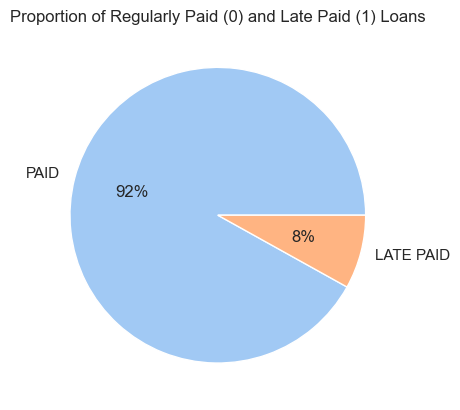

In [39]:
# Target is very imbalanced
mdata2["TARGET"].value_counts(normalize=True).plot.pie(labels=["PAID", "LATE PAID"], autopct='%.0f%%')
plt.ylabel(" ")
plt.title("Proportion of Regularly Paid (0) and Late Paid (1) Loans")
plt.show()

In [40]:
# Filter Target group 1
target1 = mdata2[mdata2['TARGET'] == 1]
target1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,MONTH_EMPLOYED,MONTH_REGISTRATION,MONTH_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,25,21,121,70,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.26,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
26,100031,1,Cash loans,F,N,Y,0,112500.00,979992.00,27076.50,702000.00,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.02,51,87,219,60,1,1,0,1,0,0,Cooking staff,1.00,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.55,10.00,1.00,10.00,0.00,-161.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.00,0.00,0.00,0.00,2.00,2.00
40,100047,1,Cash loans,M,N,Y,0,202500.00,1193580.00,35028.00,855000.00,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.03,47,42,39,34,1,1,0,1,0,0,Laborers,2.00,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.31,0.00,0.00,0.00,0.00,-1075.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,2.00,0.00,4.00
42,100049,1,Cash loans,F,N,N,0,135000.00,288873.00,16258.50,238500.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,36,119,1,146,1,1,1,1,1,0,Sales staff,2.00,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.67,1.00,0.00,1.00,0.00,-1480.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,2.00
81,100096,1,Cash loans,F,N,Y,0,81000.00,252000.00,14593.50,252000.00,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.03,67,12174,179,139,1,0,0,1,0,0,Unknown,2.00,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.02,1.00,1.00,1.00,1.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.00,450000.00,32746.50,450000.00,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.02,27,101,283,86,1,1,1,1,0,0,Laborers,3.00,3,3,MONDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.33,0.00,0.00,0.00,0.00,-324.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,2.00
307475,456215,1,Cash loans,F,N,N,1,144000.00,1303200.00,46809.00,1125000.00,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.01,36,80,16,156,1,1,1,1,0,0,Laborers,3.00,2,2,THURSDAY,13,0,0,0,0,0,0,Construction,0.58,0.00,0.00,0.00,0.00,-1492.00,0,1,0,0,0,0,0,0,0,0,

### Bivariate and Multivariate Analysis

### 1. Types of Contract X Target 

In [41]:
# Cash Loan are more frequent type of contract in both Target groups  
mdata2["NAME_CONTRACT_TYPE"].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

#### 1.1. Both Target Groups - Bivariate Analysis

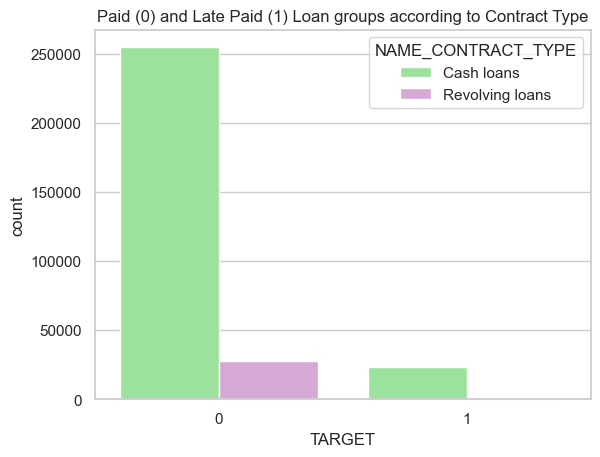

In [42]:
colors1 = ["LightGreen","Plum"]
sns.countplot(mdata2, x= "TARGET", hue="NAME_CONTRACT_TYPE", palette = colors1)
plt.title("Paid (0) and Late Paid (1) Loan groups according to Contract Type")
plt.show()

#### 1.2. Isolated Target Groups - Bivariate Analysis

Text(0.5, 1.0, 'Types of Contract only for Late Payments (Target 1)')

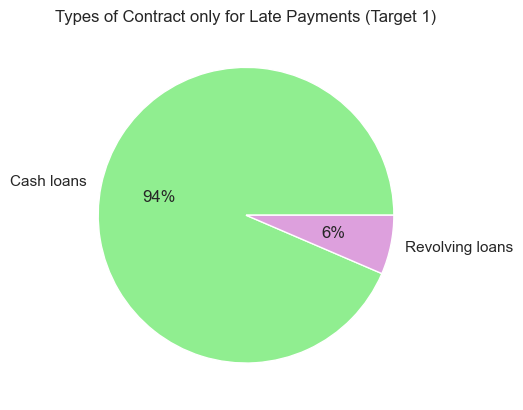

In [43]:
# Target 1 - Pie chart per type of contract
mdata2[mdata2["TARGET"] == 1]['NAME_CONTRACT_TYPE'].value_counts(normalize = True).plot.pie(colors = colors1, autopct='%.0f%%')
plt.ylabel("")
plt.title("Types of Contract only for Late Payments (Target 1)")

Text(0.5, 1.0, 'Types of Contract only for Regular Payments (Target 0)')

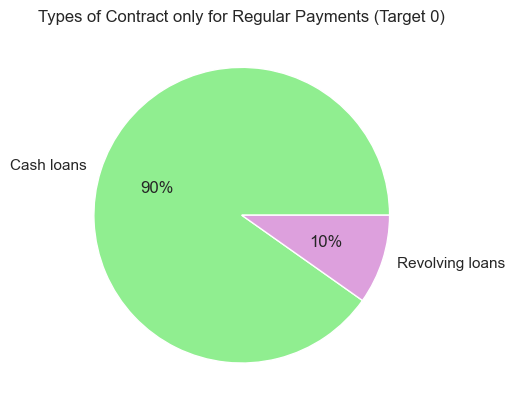

In [44]:
# Target 0 - Pie chart per type of contract
mdata2[mdata2["TARGET"] == 0]['NAME_CONTRACT_TYPE'].value_counts(normalize = True).plot.pie(colors = colors1, autopct='%.0f%%')
plt.ylabel("")
plt.title("Types of Contract only for Regular Payments (Target 0)")

### 2. Gender and Age X Target

#### 2.1. Gender - Univariate Analysis

In [45]:
mdata2["CODE_GENDER"].value_counts(normalize = True)

CODE_GENDER
F     0.66
M     0.34
XNA   0.00
Name: proportion, dtype: float64

In [46]:
# Filter columns CODE_GENDER to Remove XNA
gender_filt = mdata2[mdata2["CODE_GENDER"] != "XNA"]
gender_filt["CODE_GENDER"].value_counts(normalize = True)

CODE_GENDER
F   0.66
M   0.34
Name: proportion, dtype: float64

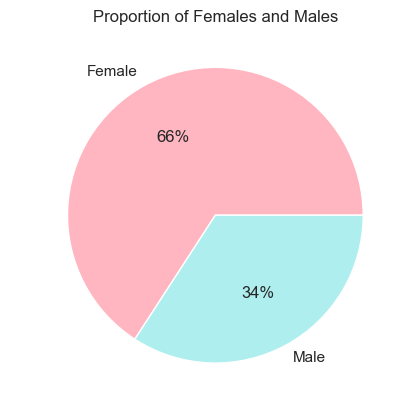

In [47]:
colors2 = ["LightPink","PaleTurquoise",]

gender_filt["CODE_GENDER"].value_counts(normalize=True).plot.pie(labels=["Female", "Male"], colors = colors2, autopct='%.0f%%')
plt.ylabel(" ")
plt.title("Proportion of Females and Males")
plt.show()

#### 2.2. Age - Univariate Analysis

In [48]:
mdata2["AGE"].value_counts(normalize = True, bins=5)

AGE
(29.8, 39.6]    0.27
(39.6, 49.4]    0.25
(49.4, 59.2]    0.22
(19.95, 29.8]   0.15
(59.2, 69.0]    0.12
Name: proportion, dtype: float64

In [49]:
mdata2["AGE"].describe()

count   307511.00
mean        43.44
std         11.95
min         20.00
25%         34.00
50%         43.00
75%         53.00
max         69.00
Name: AGE, dtype: float64

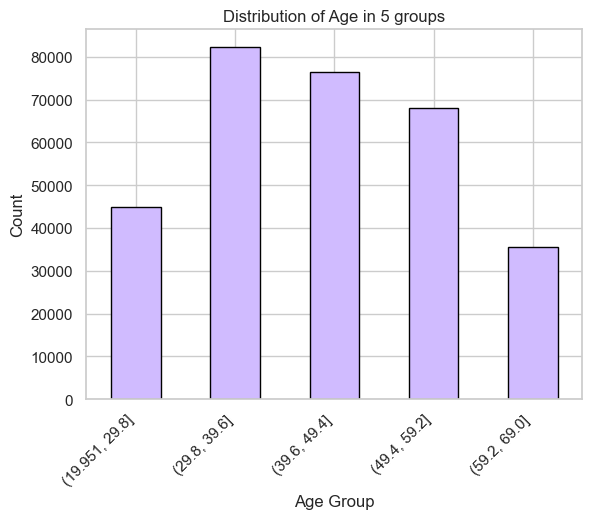

In [50]:
# Create the age bins
age_bins = pd.cut(mdata2["AGE"], bins=5)

# Plot the age distribution with bars sorted by age
mdata2["AGE_BIN"] = age_bins
mdata2["AGE_BIN"].value_counts().sort_index().plot.bar(color = "m", edgecolor="black")

plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Age in 5 groups")
plt.xticks(rotation=45, ha="right")
plt.show()

#### 2.3. Gender X Age - Bivariate Analysis

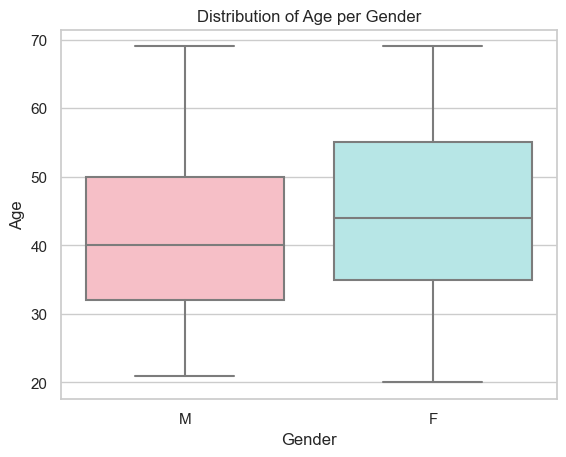

In [51]:
# Check Distribution Age per Gender
sns.boxplot(data = gender_filt, x="CODE_GENDER", y="AGE", palette=colors2)
plt.ylabel("Age")
plt.xlabel("Gender")
plt.title("Distribution of Age per Gender")
plt.show()

#### 2.4. Gender x Age per Target group - Multivariate Analysis

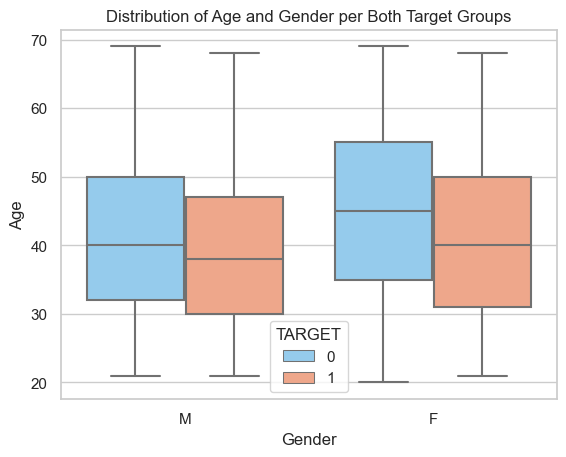

In [52]:
# Both Target Groups
sns.boxplot(data = gender_filt, x="CODE_GENDER", y="AGE", hue="TARGET", palette=["LightSkyBlue","LightSalmon"])
plt.ylabel("Age")
plt.xlabel("Gender")
plt.title("Distribution of Age and Gender per Both Target Groups")
plt.show()

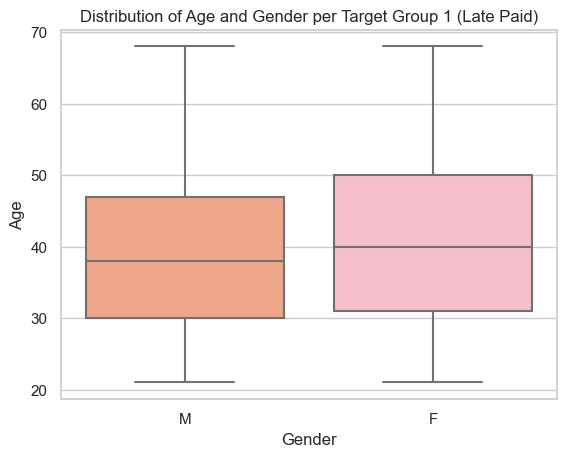

In [53]:
# Target 1 
gender_filt = mdata2[mdata2['CODE_GENDER'] != 'XNA']
tar1_gender_filt = gender_filt[gender_filt['TARGET'] == 1]

sns.boxplot(data=tar1_gender_filt, x='CODE_GENDER', y='AGE', palette=["LightSalmon", "LightPink"])
plt.ylabel("Age")
plt.xlabel("Gender")
plt.title("Distribution of Age and Gender per Target Group 1 (Late Paid)")
plt.show()

### 3. Income Type and Amout X Target

#### 3.1. Income type - Univariate Analysis

In [54]:
mdata2["NAME_INCOME_TYPE"].value_counts(normalize = True)

NAME_INCOME_TYPE
Working                0.52
Commercial associate   0.23
Pensioner              0.18
State servant          0.07
Unemployed             0.00
Student                0.00
Businessman            0.00
Maternity leave        0.00
Name: proportion, dtype: float64

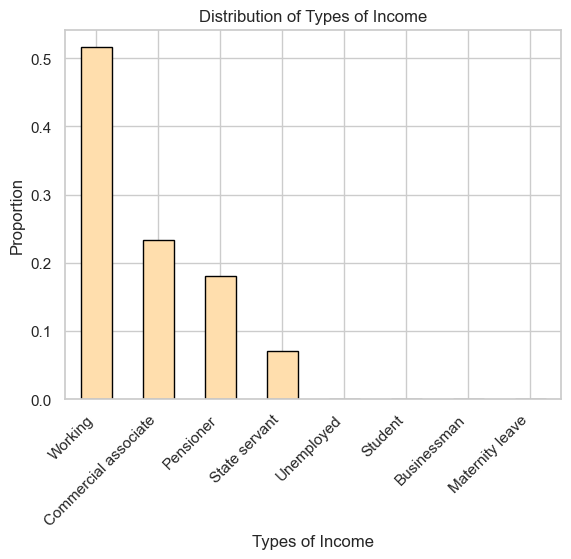

In [55]:
# Distribution of Income types for both Target Groups in percentage
mdata2["NAME_INCOME_TYPE"].value_counts(normalize = True).plot.bar(color = "NavajoWhite", edgecolor="black")

plt.xlabel("Types of Income")
plt.ylabel("Proportion")
plt.title("Distribution of Types of Income")
plt.xticks(rotation=45, ha="right")
plt.show()

#### 3.2. Income Type X Target - Bivariate Analysis

In [56]:
target1["NAME_INCOME_TYPE"].value_counts(normalize=True)

NAME_INCOME_TYPE
Working                0.61
Commercial associate   0.22
Pensioner              0.12
State servant          0.05
Unemployed             0.00
Maternity leave        0.00
Name: proportion, dtype: float64

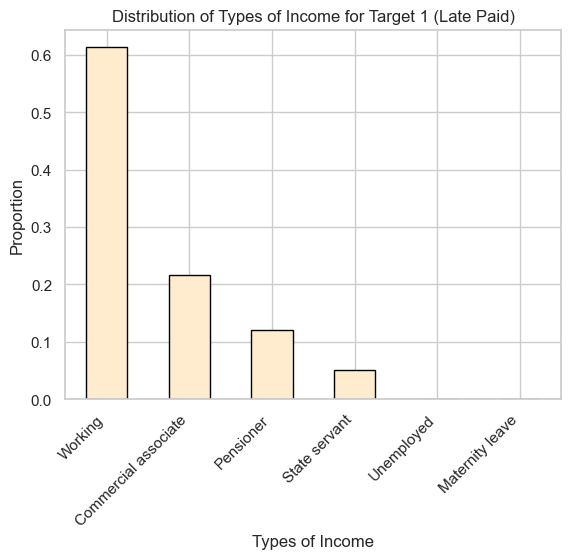

In [57]:
# Distribution of Income types for target 1
target1["NAME_INCOME_TYPE"].value_counts(normalize=True).plot.bar(color = "BlanchedAlmond", edgecolor="black")

plt.xlabel("Types of Income")
plt.ylabel("Proportion")
plt.title("Distribution of Types of Income for Target 1 (Late Paid)")
plt.xticks(rotation=45, ha="right")
plt.show()

#### 3.3. Income Amount - Univariate Analysis

In [58]:
mdata2["AMT_INCOME_TOTAL"].describe()

count      307511.00
mean       168797.92
std        237123.15
min         25650.00
25%        112500.00
50%        147150.00
75%        202500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

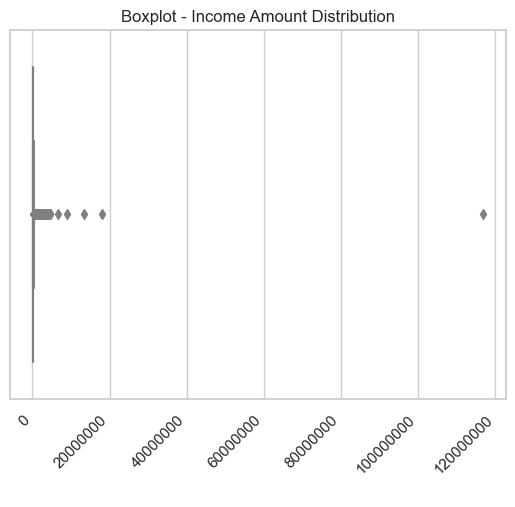

In [59]:
# Boxplot Income Amount Distribution
# Presence of outliers
sns.boxplot(data = mdata2, x="AMT_INCOME_TOTAL", palette=["c"])
plt.title("Boxplot - Income Amount Distribution")
plt.xlabel(" ")
# Set x-axis tick labels to display as regular decimal numbers
plt.ticklabel_format(style="plain", axis="x")
plt.xticks(rotation=45, ha="right")
plt.show()

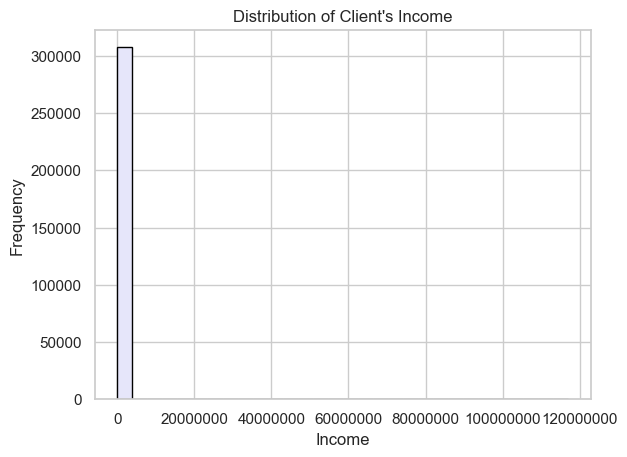

In [60]:
plt.hist(mdata2["AMT_INCOME_TOTAL"], bins=30, color="Lavender", edgecolor="black")
plt.title("Distribution of Client\'s Income")
plt.xlabel("Income")
plt.ylabel("Frequency")

# Modify x-axis tick labels to display as regular decimal numbers
plt.ticklabel_format(style="plain", axis="x")
plt.show()

#### 3.4. Income Type and amount X Target - Multivariate Analysis

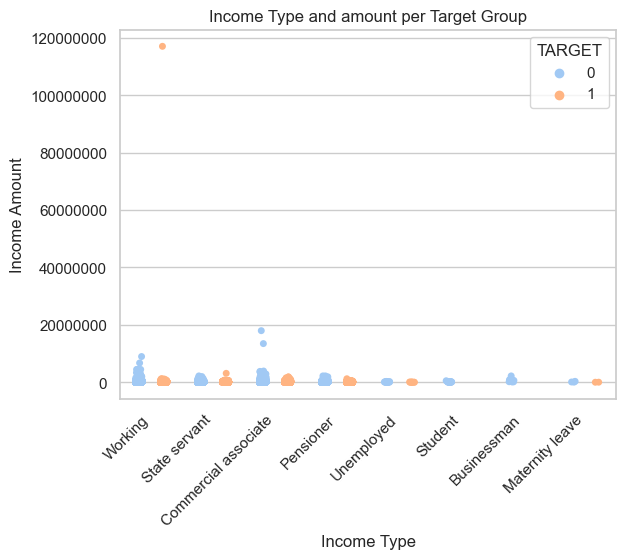

In [61]:
# Both Target Groups
sns.stripplot(data=mdata2, x="NAME_INCOME_TYPE", y ="AMT_INCOME_TOTAL", hue="TARGET", dodge=True )
plt.xlabel("Income Type")
plt.ylabel("Income Amount")
plt.title("Income Type and amount per Target Group")
plt.xticks(rotation=45, ha="right")

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

plt.show()

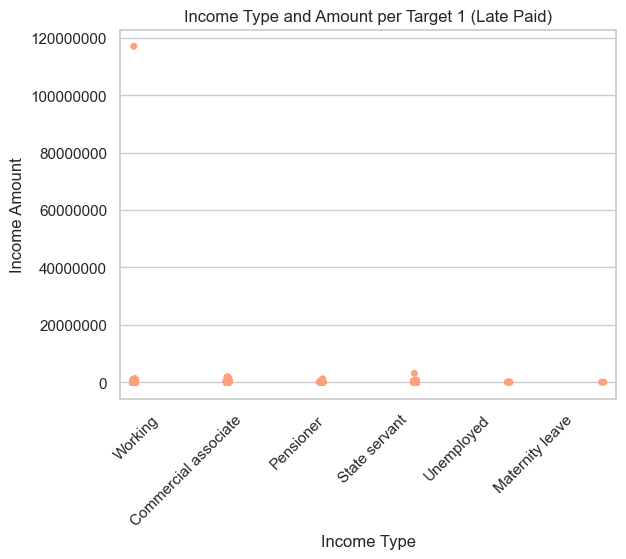

In [62]:
# Isolated Target 1
sns.stripplot(data=target1, x="NAME_INCOME_TYPE", y ="AMT_INCOME_TOTAL", dodge=True, palette = ["LightSalmon"] )
plt.xlabel("Income Type")
plt.ylabel("Income Amount")
plt.title("Income Type and Amount per Target 1 (Late Paid)")
plt.xticks(rotation=45, ha="right")

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

plt.show()

### 4. Credit Amount, Loan Annuity and Price of the Good granted with loan X Target

#### 4.1. Credit Amount - Univariate Analysis

In [63]:
mdata2["AMT_CREDIT"].describe()

count    307511.00
mean     599026.00
std      402490.78
min       45000.00
25%      270000.00
50%      513531.00
75%      808650.00
max     4050000.00
Name: AMT_CREDIT, dtype: float64

In [64]:
mdata2["AMT_CREDIT"].value_counts(normalize=True,bins=5)

AMT_CREDIT
(40994.999, 846000.0]    0.77
(846000.0, 1647000.0]    0.21
(1647000.0, 2448000.0]   0.02
(2448000.0, 3249000.0]   0.00
(3249000.0, 4050000.0]   0.00
Name: proportion, dtype: float64

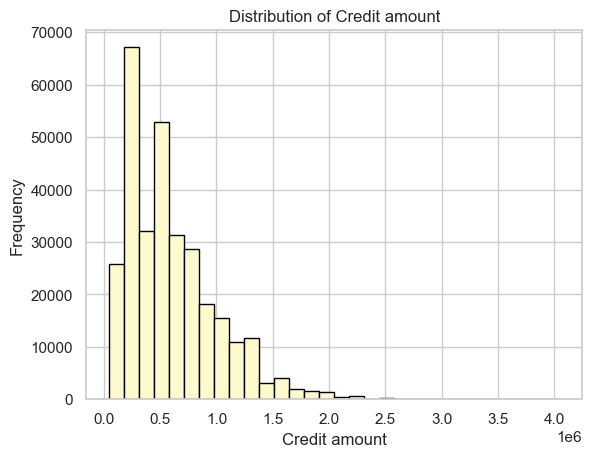

In [65]:
# Credit amount of Loan received
plt.hist(mdata2["AMT_CREDIT"], bins=30, color="LemonChiffon", edgecolor="black")
plt.title("Distribution of Credit amount")
plt.xlabel("Credit amount")
plt.ylabel("Frequency")

# Modify x-axis tick labels to display as regular decimal numbers
#plt.ticklabel_format(style='plain', axis='x')
plt.show()

#### 4.2. Loan Annuity - Univariate Analysis

In [66]:
mdata2["AMT_ANNUITY"].describe()

count   307511.00
mean     27107.87
std      14493.90
min       1615.50
25%      16524.00
50%      24903.00
75%      34596.00
max     258025.50
Name: AMT_ANNUITY, dtype: float64

In [67]:
mdata2["AMT_ANNUITY"].value_counts(normalize=True,bins=5)

AMT_ANNUITY
(1359.089, 52897.5]    0.95
(52897.5, 104179.5]    0.05
(104179.5, 155461.5]   0.00
(206743.5, 258025.5]   0.00
(155461.5, 206743.5]   0.00
Name: proportion, dtype: float64

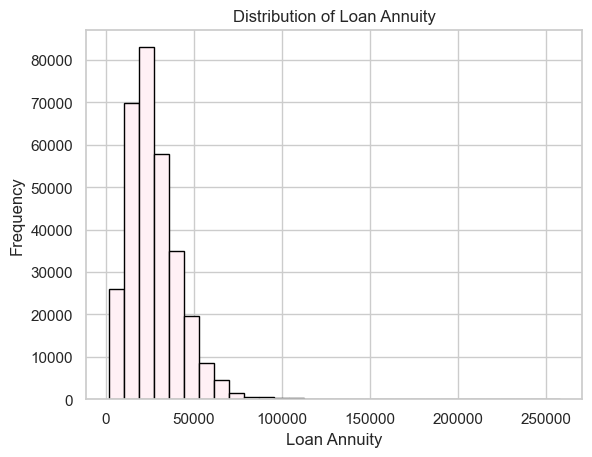

In [68]:
# Loan Annuity
plt.hist(mdata2["AMT_ANNUITY"], bins=30, color="LavenderBlush", edgecolor="black")
plt.title("Distribution of Loan Annuity")
plt.xlabel("Loan Annuity")
plt.ylabel("Frequency")

# Modify x-axis tick labels to display as regular decimal numbers
#plt.ticklabel_format(style='plain', axis='x')
plt.show()

#### 4.3. Price of the Good granted with loan - Univariate Analysis

In [69]:
mdata2["AMT_GOODS_PRICE"].describe()

count    307511.00
mean     538316.29
std      369288.98
min       40500.00
25%      238500.00
50%      450000.00
75%      679500.00
max     4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

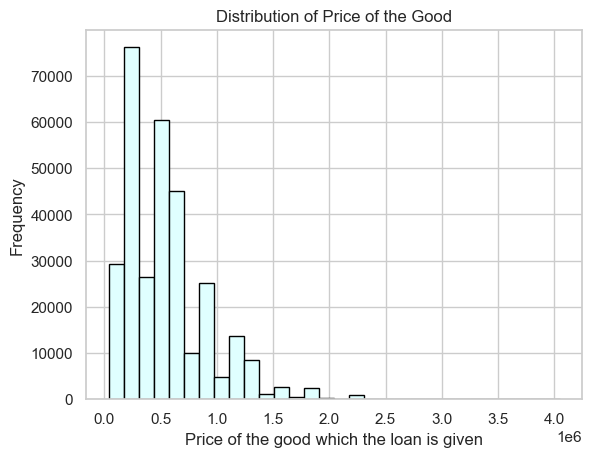

In [70]:
# the price of the goods for which the loan is given
plt.hist(mdata2["AMT_GOODS_PRICE"], bins=30, color="LightCyan", edgecolor="black")
plt.title("Distribution of Price of the Good")
plt.xlabel("Price of the good which the loan is given")
plt.ylabel("Frequency")

# Modify x-axis tick labels to display as regular decimal numbers
#plt.ticklabel_format(style='plain', axis='x')
plt.show()

### 5. Correlation Matrix: Client's Income, Credit Amount, Loan Annuity and Price of the Good granted with loan - Multivariate Analysis

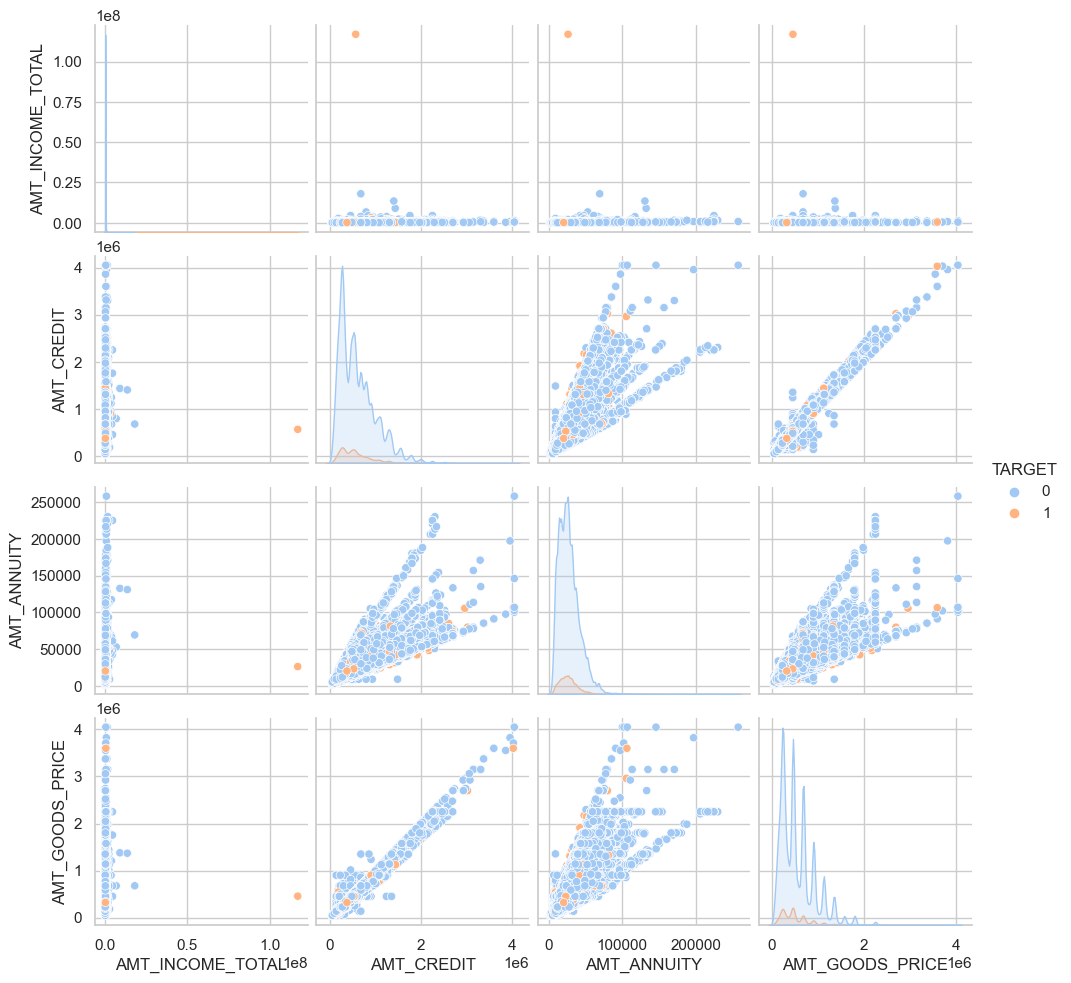

In [71]:
# Pair Plot - Income, Credit, Annuity and Price of the Good correlation
sns.pairplot(data= mdata2, vars= ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"], hue = "TARGET")
plt.show()

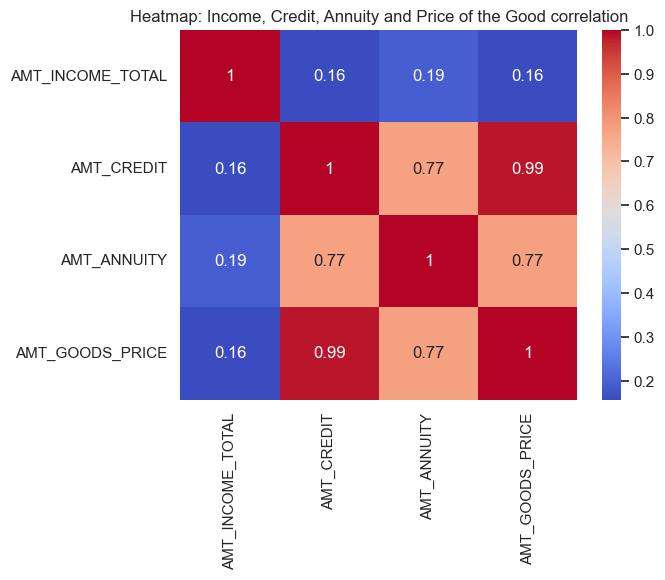

In [72]:
# Heatmap - Correlation Matrix between the 4 previous float columns
corr = mdata2.iloc[:,7:11].corr()
sns.heatmap(mdata2[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY","AMT_GOODS_PRICE"]].corr(), annot= True, cmap='coolwarm')
plt.title("Heatmap: Income, Credit, Annuity and Price of the Good correlation")
plt.show()

### 5. Weekdays X Target

#### 5.1 Weekdays - Univariate Analysis

In [73]:
# Days of week are balanced
mdata2["WEEKDAY_APPR_PROCESS_START"].value_counts(normalize=True)

WEEKDAY_APPR_PROCESS_START
TUESDAY     0.18
WEDNESDAY   0.17
MONDAY      0.16
THURSDAY    0.16
FRIDAY      0.16
SATURDAY    0.11
SUNDAY      0.05
Name: proportion, dtype: float64

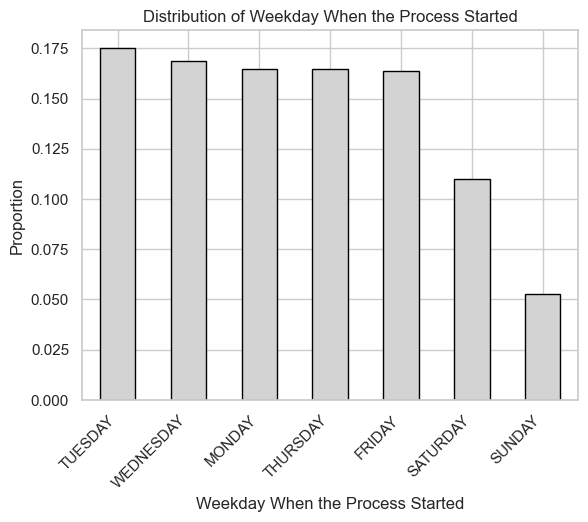

In [74]:
mdata2["WEEKDAY_APPR_PROCESS_START"].value_counts(normalize = True).plot.bar(color = "LightGrey", edgecolor="black")

plt.xlabel("Weekday When the Process Started")
plt.ylabel("Proportion")
plt.title("Distribution of Weekday When the Process Started")
plt.xticks(rotation=45, ha="right")
plt.show()

#### 5.2 Weedkays X Credit Amount per Target - Multivariate Analysis

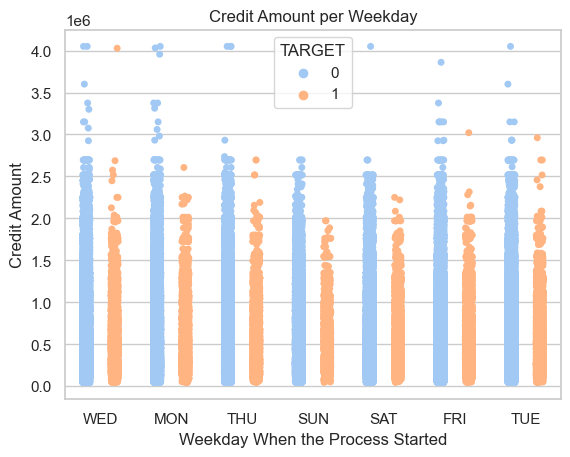

In [75]:
# Weedkays X Credit Amount - Both Target group
sns.stripplot(data=mdata2, x="WEEKDAY_APPR_PROCESS_START", y ="AMT_CREDIT", hue="TARGET", dodge=True )
plt.xlabel("Weekday When the Process Started")
plt.ylabel("Credit Amount")
plt.xticks(["TUESDAY", "WEDNESDAY", "MONDAY", "THURSDAY", "FRIDAY", "SATURDAY", "SUNDAY"],
["TUE", "WED", "MON", "THU", "FRI", "SAT", "SUN"]) 
plt.title("Credit Amount per Weekday")
plt.show()

#### 5.3 Weedkays X Loan Annuity per Target - Multivariate Analysis

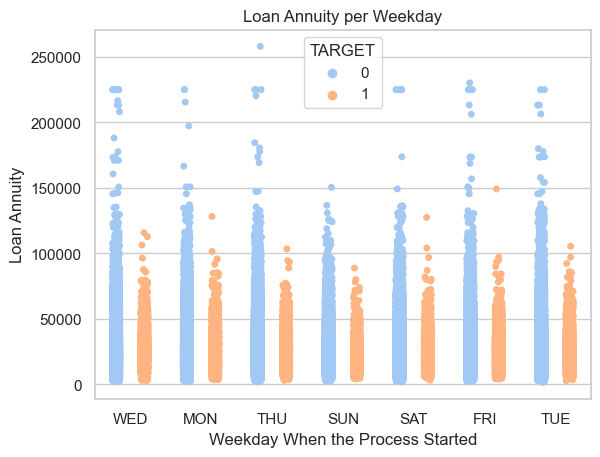

In [76]:
# Weedkays X Loan Annuity - Both Target group
sns.stripplot(data=mdata2, x="WEEKDAY_APPR_PROCESS_START", y ="AMT_ANNUITY", hue="TARGET", dodge=True )
plt.xlabel("Weekday When the Process Started")
plt.ylabel("Loan Annuity")
plt.xticks(["TUESDAY", "WEDNESDAY", "MONDAY", "THURSDAY", "FRIDAY", "SATURDAY", "SUNDAY"],
["TUE", "WED", "MON", "THU", "FRI", "SAT", "SUN"]) 
plt.title("Loan Annuity per Weekday")
plt.show()

#### 5.4 Weedkays X Goods Granted with loan per Target - Multivariate Analysis

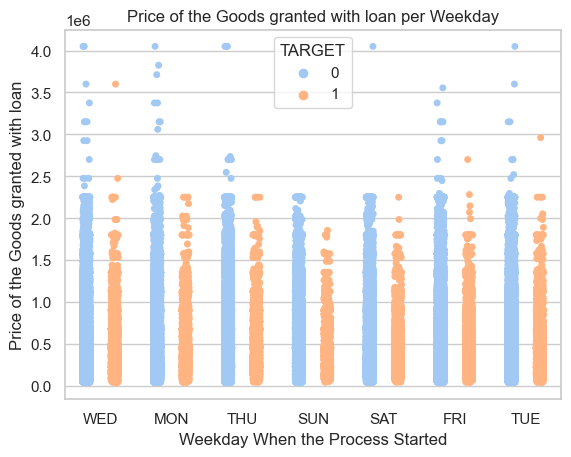

In [77]:
# Weedkays X Price of the Goods granted with loan - Both Target group
sns.stripplot(data=mdata2, x="WEEKDAY_APPR_PROCESS_START", y ="AMT_GOODS_PRICE", hue="TARGET", dodge=True )
plt.xlabel("Weekday When the Process Started")
plt.ylabel("Price of the Goods granted with loan")
plt.xticks(["TUESDAY", "WEDNESDAY", "MONDAY", "THURSDAY", "FRIDAY", "SATURDAY", "SUNDAY"],
["TUE", "WED", "MON", "THU", "FRI", "SAT", "SUN"]) 
plt.title("Price of the Goods granted with loan per Weekday")
plt.show()

### 6. Education Level, Marital Status and House Status

#### 6.1. Education Level - Univariate Analysis

In [78]:
mdata2["NAME_EDUCATION_TYPE"].value_counts(normalize = True)

NAME_EDUCATION_TYPE
Secondary / secondary special   0.71
Higher education                0.24
Incomplete higher               0.03
Lower secondary                 0.01
Academic degree                 0.00
Name: proportion, dtype: float64

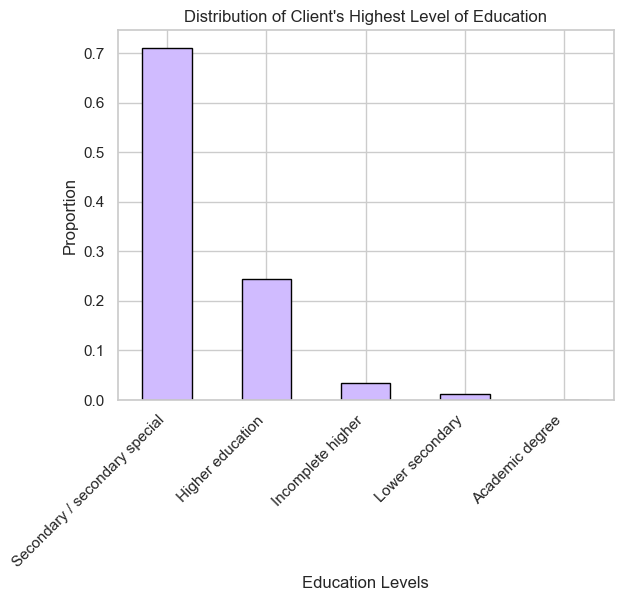

In [79]:
# Both Traget groups
mdata2["NAME_EDUCATION_TYPE"].value_counts(normalize = True).plot.bar(color = "m", edgecolor="black")

plt.xlabel("Education Levels")
plt.ylabel("Proportion")
plt.title("Distribution of Client's Highest Level of Education")
plt.xticks(rotation=45, ha="right")
plt.show()

In [80]:
# For Target 1
target1["NAME_EDUCATION_TYPE"].value_counts(normalize = True)

NAME_EDUCATION_TYPE
Secondary / secondary special   0.79
Higher education                0.16
Incomplete higher               0.04
Lower secondary                 0.02
Academic degree                 0.00
Name: proportion, dtype: float64

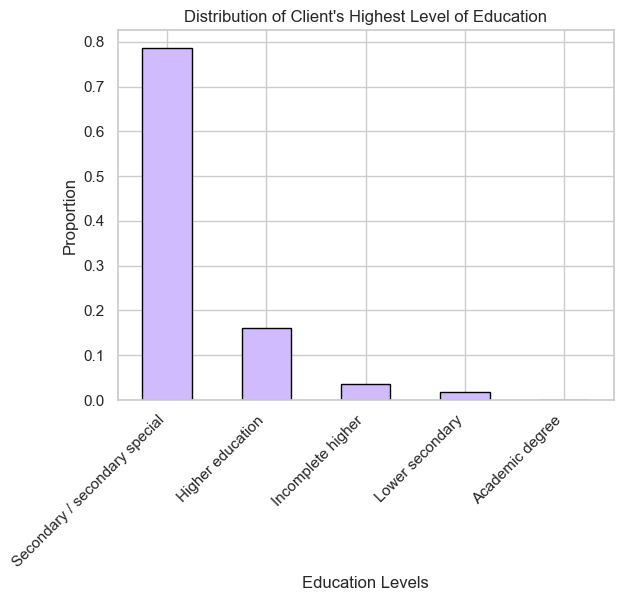

In [81]:
# For Target 1
target1["NAME_EDUCATION_TYPE"].value_counts(normalize = True).plot.bar(color = "m", edgecolor="black")

plt.xlabel("Education Levels")
plt.ylabel("Proportion")
plt.title("Distribution of Client's Highest Level of Education")
plt.xticks(rotation=45, ha="right")
plt.show()

#### 6.2. Marital Status - Univariate Analysis

In [82]:
mdata2["NAME_FAMILY_STATUS"].value_counts(normalize = True)

NAME_FAMILY_STATUS
Married                0.64
Single / not married   0.15
Civil marriage         0.10
Separated              0.06
Widow                  0.05
Unknown                0.00
Name: proportion, dtype: float64

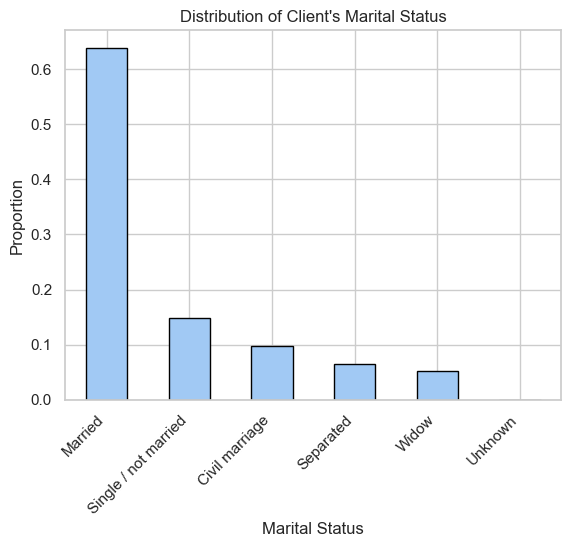

In [83]:
# Both Target Groups
mdata2["NAME_FAMILY_STATUS"].value_counts(normalize = True).plot.bar(color = "b", edgecolor="black")

plt.xlabel("Marital Status")
plt.ylabel("Proportion")
plt.title("Distribution of Client's Marital Status")
plt.xticks(rotation=45, ha="right")
plt.show()

In [84]:
# For Target 1
target1["NAME_FAMILY_STATUS"].value_counts(normalize = True)

NAME_FAMILY_STATUS
Married                0.60
Single / not married   0.18
Civil marriage         0.12
Separated              0.07
Widow                  0.04
Name: proportion, dtype: float64

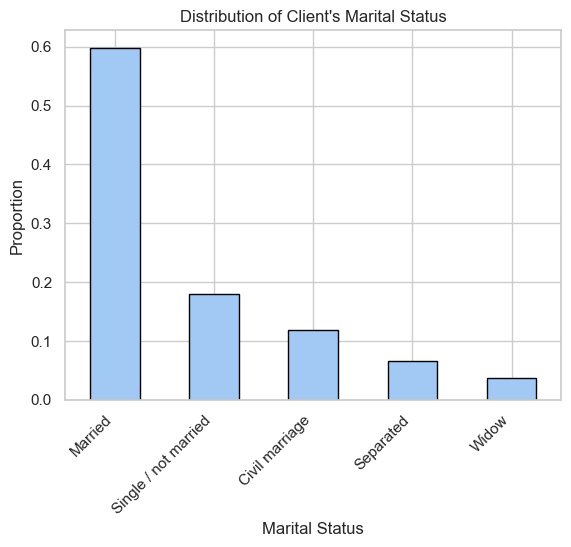

In [85]:
# for Target 1
target1["NAME_FAMILY_STATUS"].value_counts(normalize = True).plot.bar(color = "b", edgecolor="black")

plt.xlabel("Marital Status")
plt.ylabel("Proportion")
plt.title("Distribution of Client's Marital Status")
plt.xticks(rotation=45, ha="right")
plt.show()

#### 6.3. House Status - Univariate Analysis

In [86]:
mdata2["NAME_HOUSING_TYPE"].value_counts(normalize = True)

NAME_HOUSING_TYPE
House / apartment     0.89
With parents          0.05
Municipal apartment   0.04
Rented apartment      0.02
Office apartment      0.01
Co-op apartment       0.00
Name: proportion, dtype: float64

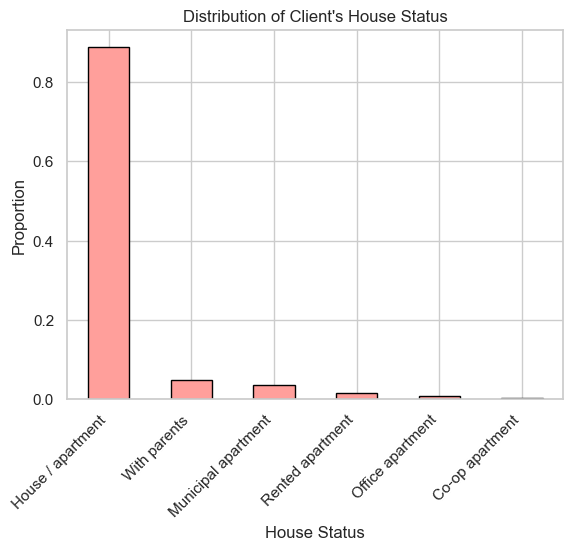

In [87]:
# Both Target Groups
mdata2["NAME_HOUSING_TYPE"].value_counts(normalize = True).plot.bar(color = "r", edgecolor="black")

plt.xlabel("House Status")
plt.ylabel("Proportion")
plt.title("Distribution of Client's House Status")
plt.xticks(rotation=45, ha="right")
plt.show()

In [88]:
# For Target 1
target1["NAME_HOUSING_TYPE"].value_counts(normalize = True)

NAME_HOUSING_TYPE
House / apartment     0.86
With parents          0.07
Municipal apartment   0.04
Rented apartment      0.02
Office apartment      0.01
Co-op apartment       0.00
Name: proportion, dtype: float64

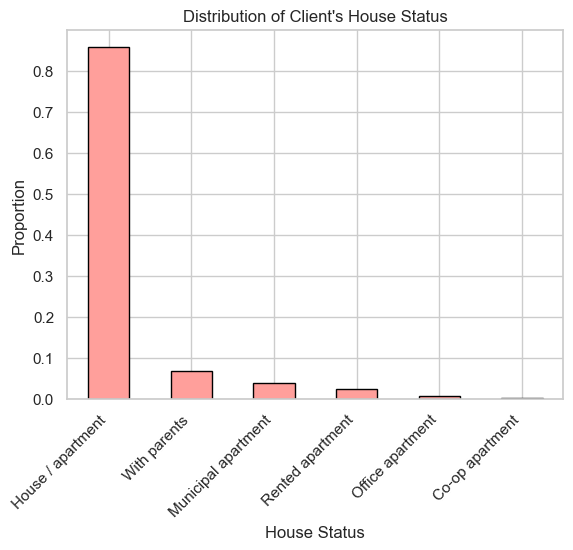

In [89]:
# For Target 1
target1["NAME_HOUSING_TYPE"].value_counts(normalize = True).plot.bar(color = "r", edgecolor="black")

plt.xlabel("House Status")
plt.ylabel("Proportion")
plt.title("Distribution of Client's House Status")
plt.xticks(rotation=45, ha="right")
plt.show()

#### 6.4 Marital Status and Educational Level per Target 1 

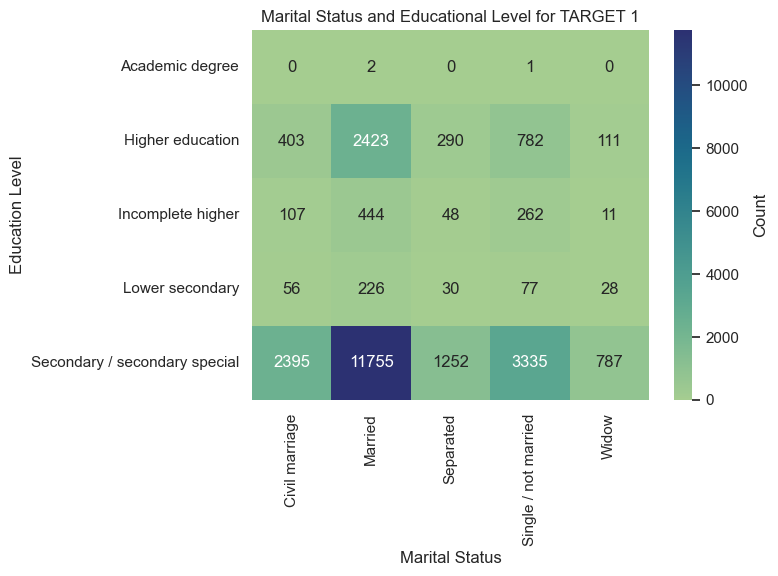

In [90]:
# Remove "Unknown" from Family Status
family_filt = mdata2[mdata2["NAME_FAMILY_STATUS"] != "Unknown"]
# Filter data where TARGET is 1
tar1_family_filt = family_filt[family_filt["TARGET"] == 1]

# Create a pivot table
tar1_pivot = pd.pivot_table(data=tar1_family_filt, index="NAME_EDUCATION_TYPE", columns="NAME_FAMILY_STATUS", 
                            values="TARGET", aggfunc="count", fill_value=0)

# Plot the heatmap
sns.heatmap(tar1_pivot, annot=True, fmt="d", cmap="crest", cbar_kws={"label": "Count"})
plt.title("Marital Status and Educational Level for TARGET 1")
plt.xlabel("Marital Status")
plt.ylabel("Education Level")
plt.show()

#### 6.5. Marital Status and Type of Income per Target 1

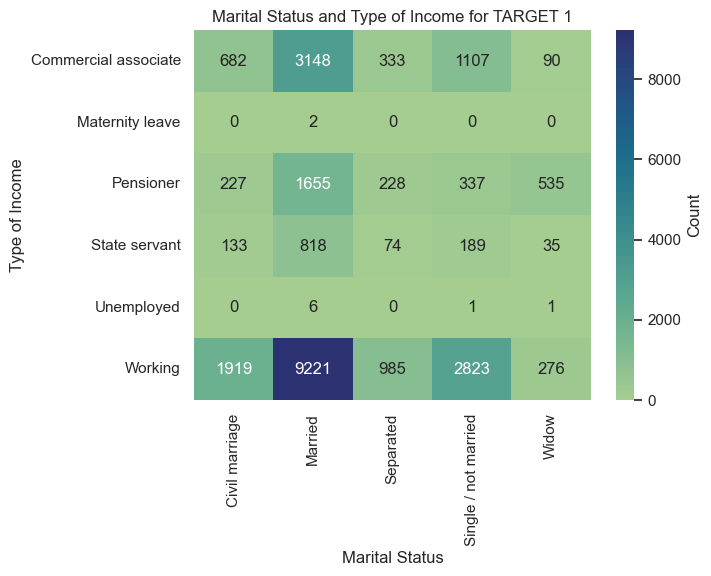

In [91]:
# Remove "Unknown" from Family Status
family_filt = mdata2[mdata2["NAME_FAMILY_STATUS"] != "Unknown"]
# Filter data where TARGET is 1
tar1_family_filt = family_filt[family_filt["TARGET"] == 1]

# Create a pivot table
tar1_pivot = pd.pivot_table(data=tar1_family_filt, index="NAME_INCOME_TYPE", columns="NAME_FAMILY_STATUS", 
                            values="TARGET", aggfunc="count", fill_value=0)

# Plot the heatmap
sns.heatmap(tar1_pivot, annot=True, fmt="d", cmap="crest", cbar_kws={"label": "Count"})
plt.title("Marital Status and Type of Income for TARGET 1")
plt.xlabel("Marital Status")
plt.ylabel("Type of Income")
plt.show()

#### 6.6. House Status and Type of Income for Target 1

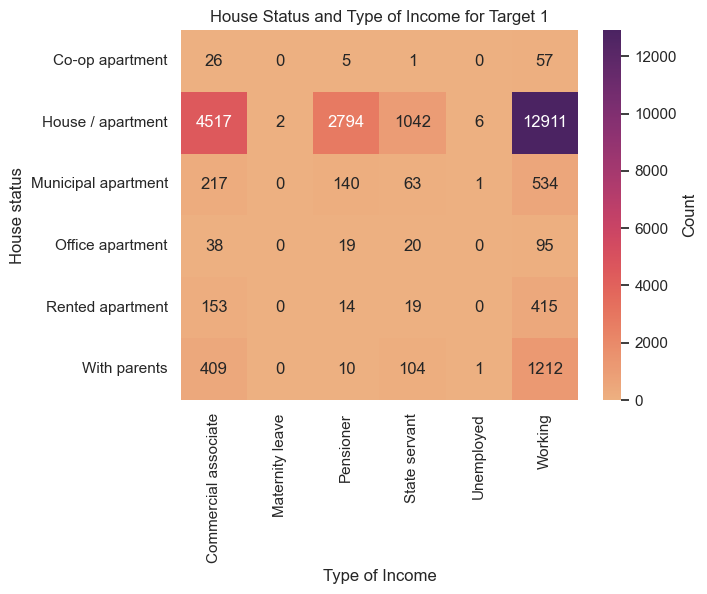

In [92]:
# Create a pivot table
tar1_pivot = pd.pivot_table(data=target1, index="NAME_HOUSING_TYPE", columns="NAME_INCOME_TYPE", 
                            values="TARGET", aggfunc="count", fill_value=0)

# Plot the heatmap
sns.heatmap(tar1_pivot, annot=True, fmt="d", cmap="flare", cbar_kws={"label": "Count"})
plt.title("House Status and Type of Income for Target 1")
plt.ylabel("House status")
plt.xlabel("Type of Income")
plt.show()

#### 6.7. House Status and Marital Status for TARGET 1

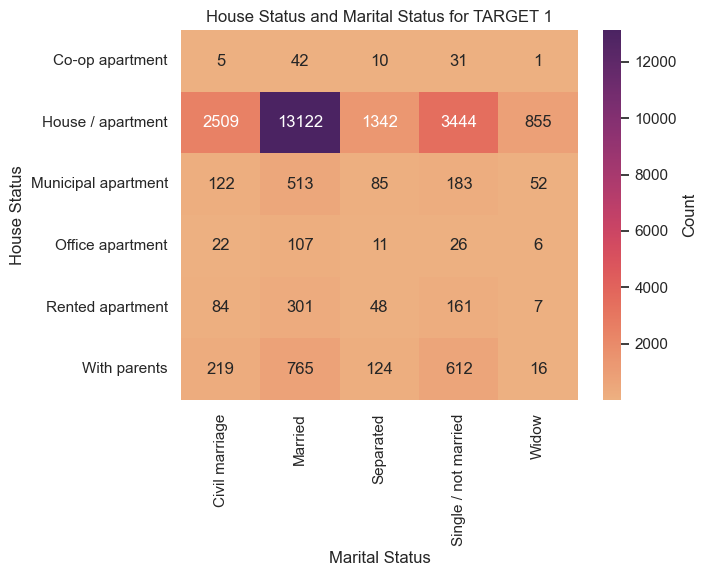

In [93]:
# Remove "Unknown" from Family Status
family_filt = mdata2[mdata2["NAME_FAMILY_STATUS"] != "Unknown"]
# Filter data where TARGET is 1
tar1_family_filt = family_filt[family_filt["TARGET"] == 1]

# aCreate a pivot table
tar1_pivot = pd.pivot_table(data=tar1_family_filt, index="NAME_HOUSING_TYPE", columns="NAME_FAMILY_STATUS", 
                            values="TARGET", aggfunc="count", fill_value=0)

# Plot the heatmap
sns.heatmap(tar1_pivot, annot=True, fmt="d", cmap="flare", cbar_kws={"label": "Count"})
plt.title("House Status and Marital Status for TARGET 1")
plt.xlabel("Marital Status")
plt.ylabel("House Status")
plt.show()

#### 6.8 House status and Educational Level per Target 1

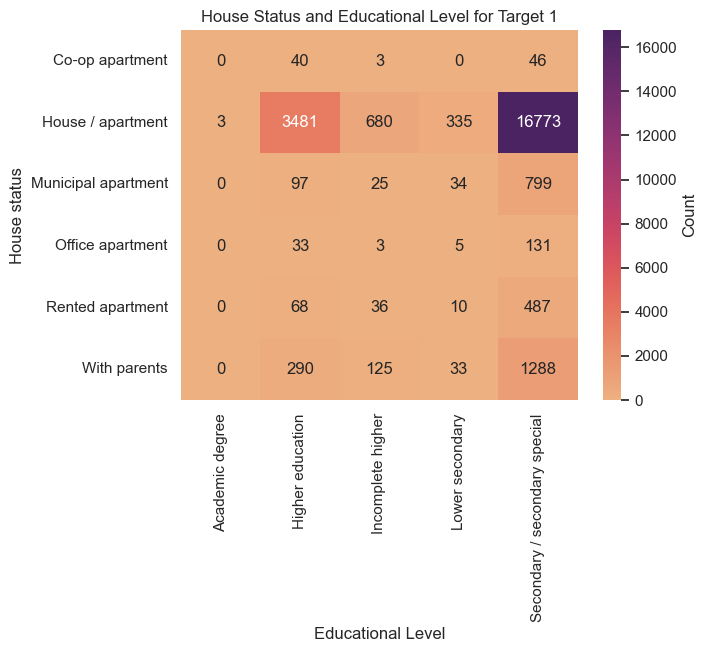

In [94]:
# Create a pivot table
tar1_pivot = pd.pivot_table(data=target1, index="NAME_HOUSING_TYPE", columns="NAME_EDUCATION_TYPE", 
                            values="TARGET", aggfunc="count", fill_value=0)

# Plot the heatmap
sns.heatmap(tar1_pivot, annot=True, fmt="d", cmap="flare", cbar_kws={"label": "Count"})
plt.title("House Status and Educational Level for Target 1")
plt.ylabel("House status")
plt.xlabel("Educational Level")
plt.show()

### 7. Occupation Type

#### 7. Occupation Type - univariate Analysis

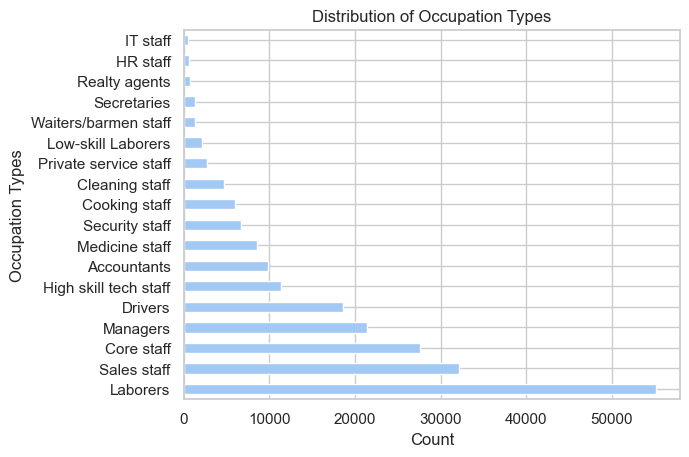

In [95]:
# Removing rows where "OCCUPATION_TYPE" is "Unknown" and plotting value counts
mdata2[mdata2["OCCUPATION_TYPE"] != "Unknown"]["OCCUPATION_TYPE"].value_counts().plot.barh()

plt.title("Distribution of Occupation Types")
plt.xlabel("Count")
plt.ylabel("Occupation Types")
plt.show()

### Late Paid Loans - House Owners / Non-Car Owners X Target 1

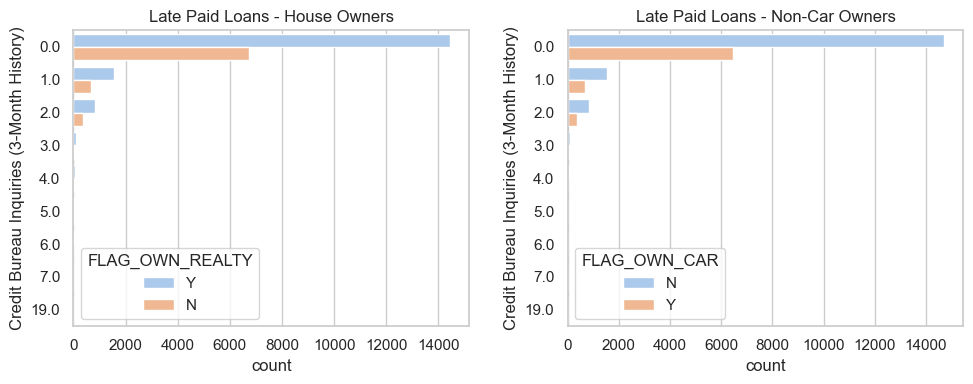

In [96]:
# How many times client's credit information was requested or checked by financial institutions
# in the last 3 months before application (excluding first month before application).

plt.figure(figsize=[10,4])

plt.subplot(1,2,1)
# People LATE LOAN
# most are house owners
sns.countplot(y= target1['AMT_REQ_CREDIT_BUREAU_QRT'], hue="FLAG_OWN_REALTY", data=target1)
plt.ylabel("Credit Bureau Inquiries (3-Month History)")
plt.title("Late Paid Loans - House Owners")

plt.subplot(1,2,2)
# People LATE LOAN
# MOST are NOT car owners
sns.countplot(y= target1['AMT_REQ_CREDIT_BUREAU_QRT'], hue="FLAG_OWN_CAR", data=target1)
plt.title("Late Paid Loans - Non-Car Owners")
plt.ylabel("Credit Bureau Inquiries (3-Month History)")

plt.tight_layout()
plt.show()